In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [8]:
def load_data(path):
    # read data from .txt file and assign names to columns
    data = pd.read_csv(path, sep=":::", names=["ID", "Title", "Genre", "Plot"], engine="python")
    # We aren't gonna need ID, so drop this column
    data.drop(columns=["ID"], inplace=True)
    return data
df = load_data("Genre Classification Dataset/train_data.txt")

In [10]:
df.head()

,Title,Genre,Plot
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   54214 non-null  object
 1   Genre   54214 non-null  object
 2   Plot    54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [14]:
df.shape

(54214, 3)

In [16]:
df.describe()

,Title,Genre,Plot
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [18]:
df.isnull().sum()

Title    0
Genre    0
Plot     0
dtype: int64

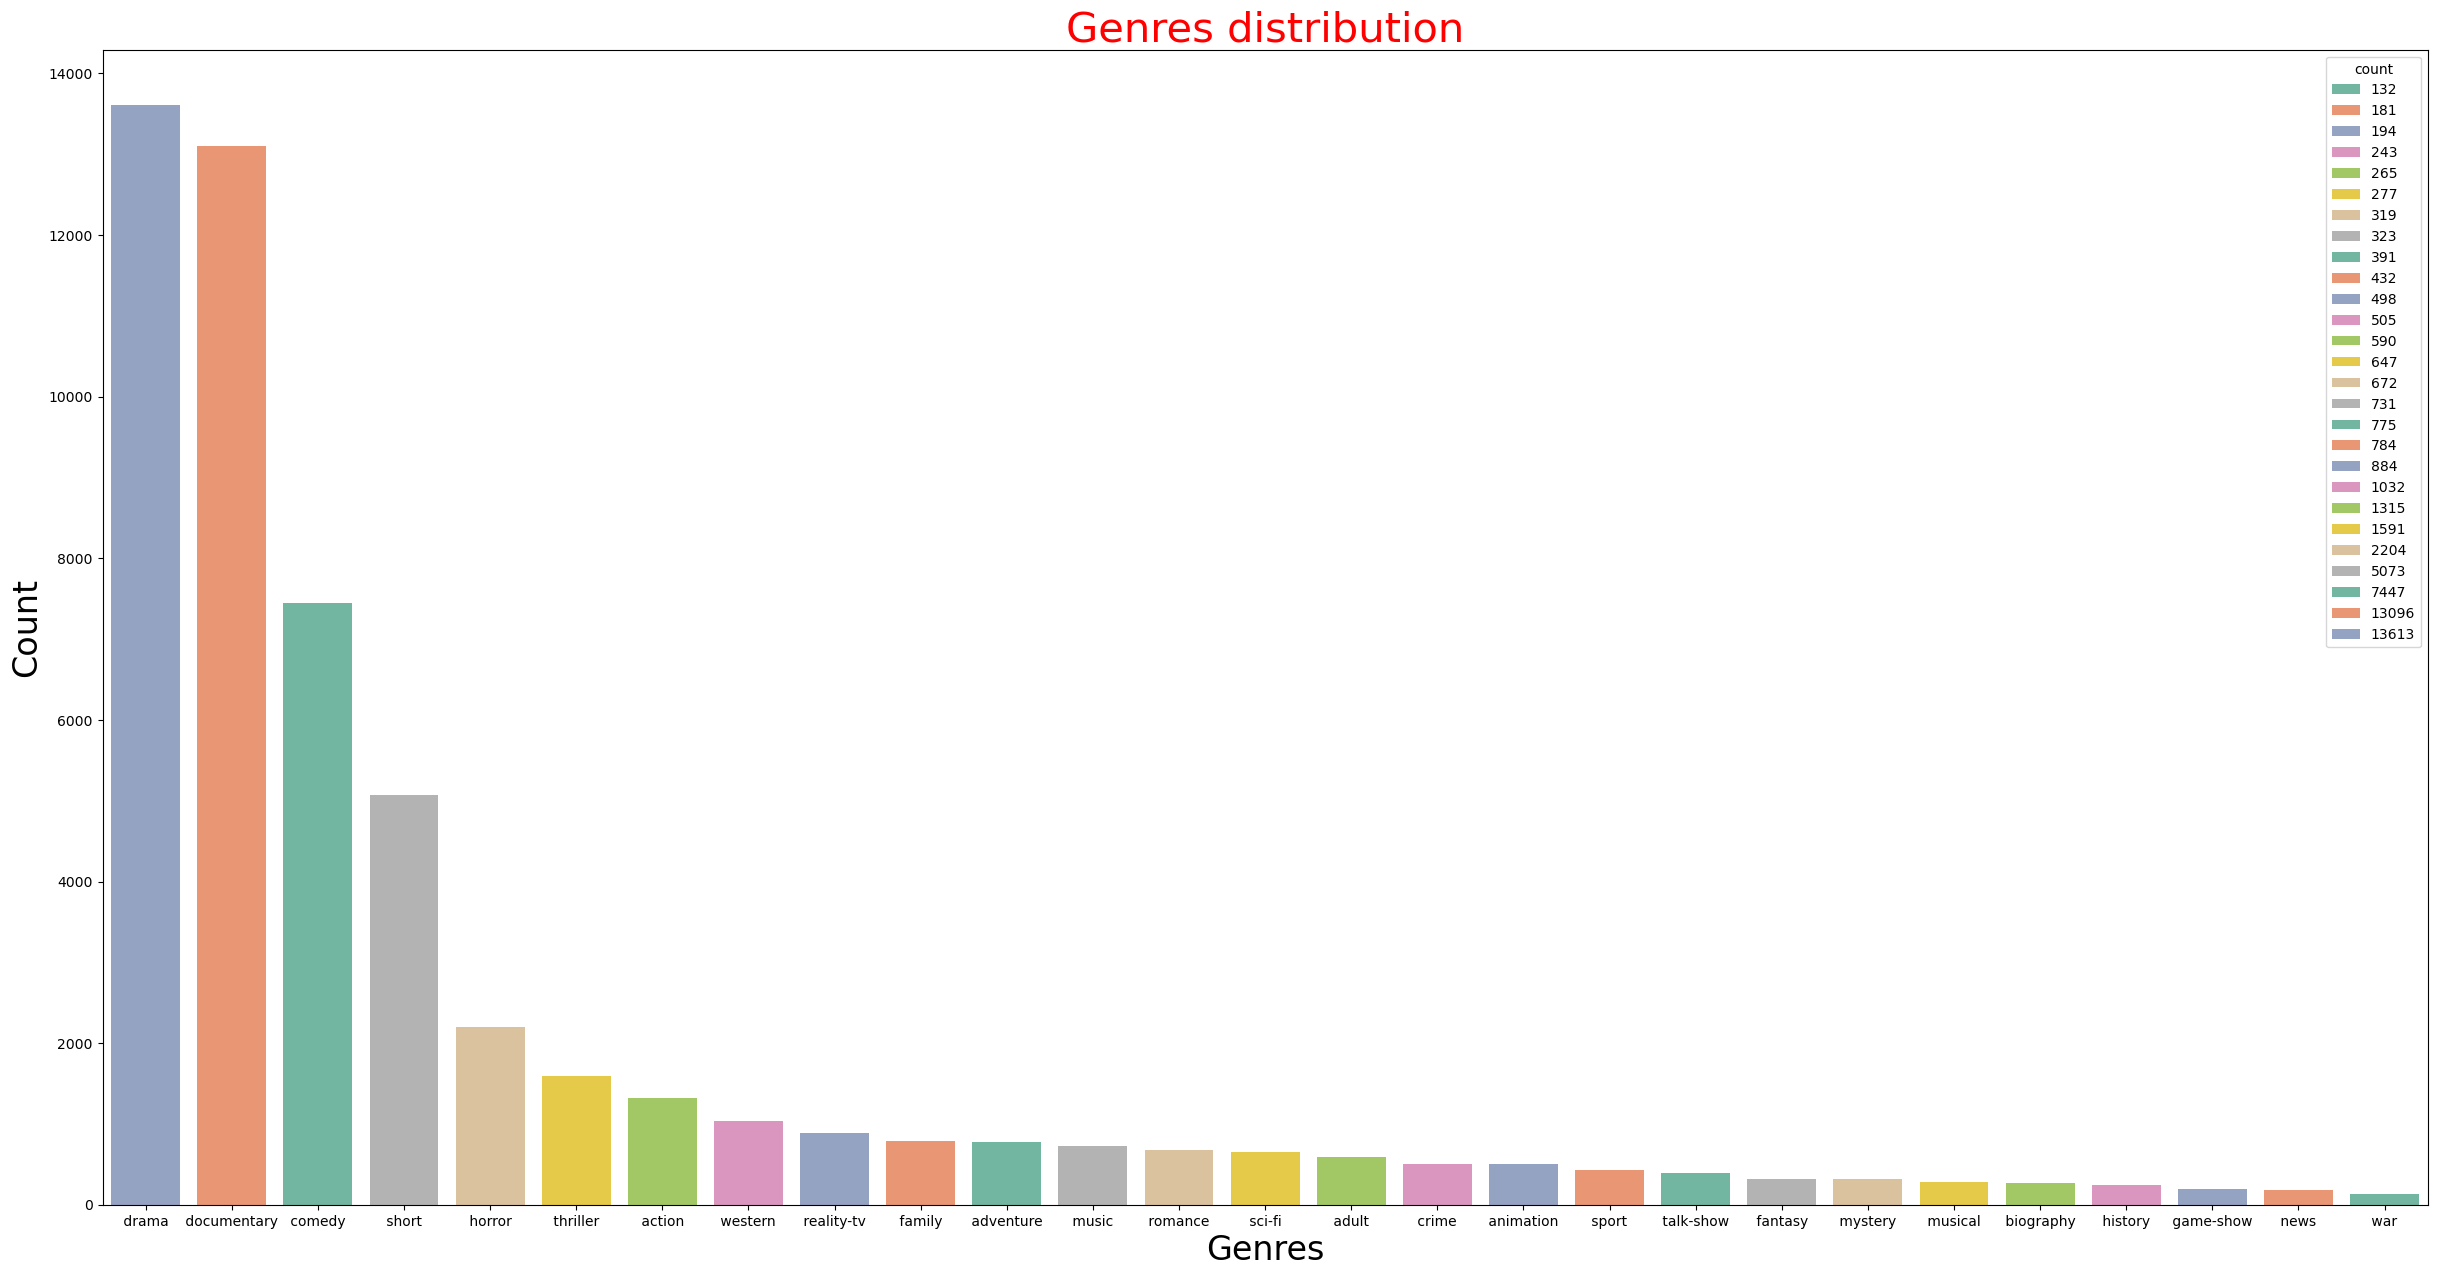

In [20]:
genres = df['Genre'].value_counts() 
plt.figure(figsize=(30,15))
sns.barplot(x=genres.index, y=genres, palette="Set2", hue=genres)
plt.title("Genres distribution", fontsize=30, c='r')
plt.xlabel("Genres", fontsize=24)
plt.ylabel("Count", fontsize=24)
plt.show()

In [22]:
vectorizer = TfidfVectorizer()
vectorizer.get_stop_words()

In [24]:
plot = df['Plot'][0:2] # get first plot
type(plot)

tokens = vectorizer.fit_transform(plot)

In [26]:
vectorizer.get_feature_names_out()

array(['10', 'allow', 'and', 'anyone', 'approaches', 'as', 'bacon',
       'between', 'blue', 'brother', 'charm', 'childhood', 'christmas',
       'close', 'company', 'conversation', 'corn', 'courage', 'current',
       'doctor', 'einstein', 'except', 'experiences', 'fantastical',
       'few', 'friends', 'full', 'furious', 'get', 'has', 'have', 'he',
       'her', 'him', 'his', 'hospital', 'imagination', 'in', 'incestuous',
       'lady', 'learns', 'life', 'listening', 'live', 'love', 'meets',
       'murderous', 'murders', 'nobody', 'of', 'old', 'on', 'only',
       'oscar', 'parents', 'past', 'peggy', 'pink', 'pop', 'professional',
       'refuses', 'reject', 'relationship', 'rose', 'she', 'sister',
       'speak', 'stairs', 'straight', 'sweetheart', 'talking', 'tell',
       'the', 'to', 'too', 'uses', 'weeks', 'what', 'who', 'wit', 'with',
       'women', 'wrestler', 'year'], dtype=object)

In [28]:
print(vectorizer.vocabulary_)

{'listening': 42, 'in': 37, 'to': 73, 'conversation': 15, 'between': 7, 'his': 34, 'doctor': 19, 'and': 2, 'parents': 54, '10': 0, 'year': 83, 'old': 50, 'oscar': 53, 'learns': 40, 'what': 77, 'nobody': 48, 'has': 29, 'the': 72, 'courage': 17, 'tell': 71, 'him': 33, 'he': 31, 'only': 52, 'few': 24, 'weeks': 76, 'live': 43, 'furious': 27, 'refuses': 60, 'speak': 66, 'anyone': 3, 'except': 21, 'straight': 68, 'talking': 70, 'rose': 63, 'lady': 39, 'pink': 57, 'meets': 45, 'on': 51, 'hospital': 35, 'stairs': 67, 'as': 5, 'christmas': 12, 'approaches': 4, 'uses': 75, 'her': 32, 'fantastical': 23, 'experiences': 22, 'professional': 59, 'wrestler': 82, 'imagination': 36, 'wit': 79, 'charm': 10, 'allow': 1, 'life': 41, 'love': 44, 'full': 26, 'company': 14, 'of': 49, 'friends': 25, 'pop': 58, 'corn': 16, 'einstein': 20, 'bacon': 6, 'childhood': 11, 'sweetheart': 69, 'peggy': 56, 'blue': 8, 'brother': 9, 'sister': 65, 'with': 80, 'past': 55, 'incestuous': 38, 'relationship': 62, 'have': 30, 'c

In [30]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [32]:
def clean_plot(plot):
    # first lowercase all words
    plot = plot.lower()
    # omit numbers, symbols, and all, except alphabets
    plot = re.sub(r'[^a-zA-Z\s]+', '', plot).strip()
    # remove the stopwords
    stop_words = set(stopwords.words('english'))  # You need to define stopwords
    plot = [word for word in plot.split() if word.lower() not in stop_words]
    plot = ' '.join(plot)
    # return clean plot
    return plot

In [34]:
df['Clean Plot'] = df['Plot'].apply(clean_plot)
df.head()

,Title,Genre,Plot,Clean Plot
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents yearold ...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [36]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df['Clean Plot']) 

In [38]:
X_train.shape

(54214, 146144)

In [40]:
test_data = load_data("Genre Classification Dataset/test_data_solution.txt")
test_data.head()

,Title,Genre,Plot
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [42]:
test_data['Clean Plot'] = test_data['Plot'].apply(clean_plot)
test_data.head()

,Title,Genre,Plot,Clean Plot
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",lr brane loves life car apartment job especial...
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,Er nu zhai (1955),drama,Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [44]:
X_test = vectorizer.transform(test_data['Clean Plot'])
print(X_test.shape)

(54200, 146144)


In [52]:
y_test = test_data['Genre']
y_train = df['Genre']

In [54]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {(accuracy*100):.2f}%")
print(classification_report(y_test, y_pred,  zero_division=1))

Accuracy = 44.36%
               precision    recall  f1-score   support

      action        1.00      0.00      0.00      1314
       adult        1.00      0.00      0.00       590
   adventure        1.00      0.00      0.00       775
   animation        1.00      0.00      0.00       498
   biography        1.00      0.00      0.00       264
      comedy        0.73      0.04      0.07      7446
       crime        1.00      0.00      0.00       505
 documentary        0.53      0.90      0.67     13096
       drama        0.38      0.88      0.53     13612
      family        1.00      0.00      0.00       783
     fantasy        1.00      0.00      0.00       322
   game-show        1.00      0.00      0.00       193
     history        1.00      0.00      0.00       243
      horror        1.00      0.00      0.00      2204
       music        1.00      0.00      0.00       731
     musical        1.00      0.00      0.00       276
     mystery        1.00      0.00      0.00  